# Q1)


[[[False False False False False  True]
  [False False False False False  True]
  [False False False False False False]
  ...
  [False False False  True False False]
  [False False False  True False False]
  [False False False  True False False]]

 [[False False False False False  True]
  [False False False False False  True]
  [False False False False False False]
  ...
  [False False False  True False False]
  [False False False  True False False]
  [False False False  True False False]]

 [[False False False False False  True]
  [False False False False False  True]
  [False False False False False  True]
  ...
  [False False False  True False False]
  [False False False  True False False]
  [False False False  True False False]]

 ...

 [[False False False False False  True]
  [False False False False False  True]
  [False False False False False  True]
  ...
  [False False False False False  True]
  [False False False False False  True]
  [False False False False False  True]]

 [

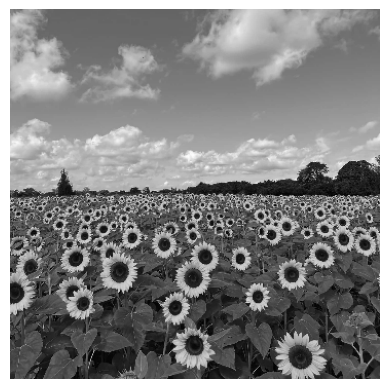

In [97]:
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_GRAYSCALE)
im = cv.resize(im, (im.shape[1]//4, im.shape[0]//4))
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.axis('off') 

def LoG_kernel(sigma):
    
    size = int(6*16 + 1)
    if size % 2 == 0:
        size += 1  # make sure size is odd

    # Create coordinate grid
    x = np.arange(-(size//2), size//2 + 1, 1)
    y = np.arange(-(size//2), size//2 + 1, 1)
    X, Y = np.meshgrid(x, y)

    # LoG formula
    norm = (X**2 + Y**2) / (2 * sigma**2)
    LoG = -1 / (np.pi * sigma**4) * (1 - norm) * np.exp(-norm)

    # Normalize kernel so sum of absolute values = 1
    LoG /= np.sum(np.abs(LoG))

    return LoG

sigmas = range(3, 33, 5)
scale_space = []

for i in range(len(sigmas)):
    sigma = sigmas[i]
    k = kernel(sigma)
    response = cv.filter2D(im, -1, k)
    response = (sigma**2) * np.abs(response)
    scale_space.append(response)


scale_space = np.stack(scale_space, axis=-1) 

from scipy.ndimage import maximum_filter

# 3D maximum filter
local_max = maximum_filter(scale_space, size=(5,5,5))
blobs = (scale_space == local_max) & (scale_space > threshold)

print( (blobs))







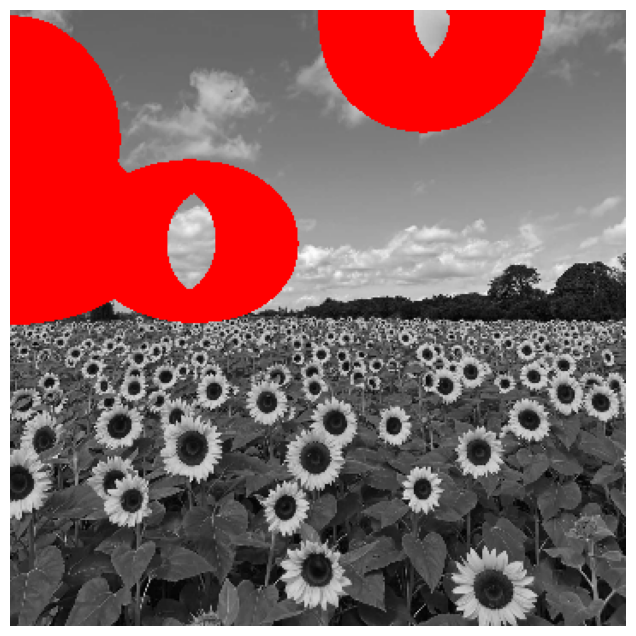

In [94]:
im_color = cv.cvtColor(im, cv.COLOR_GRAY2BGR)

# Draw circles
for e in extrema:
    y, x, s = e
    r = sigmas[s] * np.sqrt(2)
    cv.circle(im_color, (int(x), int(y)), int(r), (0, 0, 255), 1)  # Red circles

# Convert to RGB for matplotlib
im_rgb = cv.cvtColor(im_color, cv.COLOR_BGR2RGB)

# Display
plt.figure(figsize=(10, 8))
plt.imshow(im_rgb)
plt.axis('off')
plt.show()

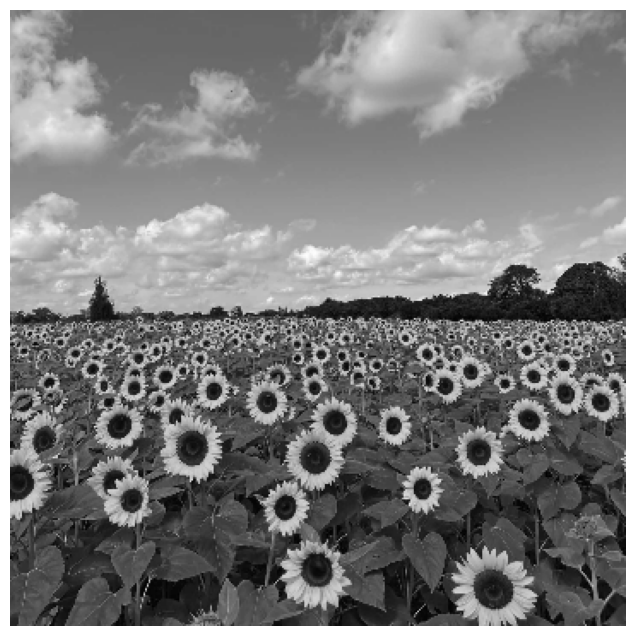

IndexError: list index out of range

In [71]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter

# 1️⃣ Load image and convert to grayscale
im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_GRAYSCALE)
im = cv.resize(im, (im.shape[1]//4, im.shape[0]//4))

# 2️⃣ Function to create LoG kernel
def log_kernel(sigma):
    size = int(6*sigma + 1)
    ax = np.arange(-size//2 + 1., size//2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    norm = (xx**2 + yy**2) / (2*sigma**2)
    log = -1/(np.pi*sigma**4) * (1 - norm) * np.exp(-norm)
    return log

# 3️⃣ Build scale-space
sigmas = range(3, 57, 1)  # σ range
scale_space = []

for sigma in sigmas:
    k = log_kernel(sigma)
    response = cv.filter2D(im, -1, k)
    response = np.abs(response) * (sigma**2)  # normalize by σ² and take absolute
    scale_space.append(response)

scale_space = np.stack(scale_space, axis=-1)  # 3D array: (H, W, num_scales)

# 4️⃣ Detect local maxima in 3D (x, y, σ)
# Use maximum_filter for local maxima in 3x3x3 neighborhood
neighborhood = (4,4,4)
local_max = (scale_space == maximum_filter(scale_space, size=neighborhood))

# 5️⃣ Threshold responses to remove weak detections
threshold = 250
coords = np.argwhere((scale_space >= threshold) & local_max)

# 6️⃣ Extract coordinates and corresponding σ (radius)
blobs = []
for y, x, s_idx in coords:
    sigma = sigmas[s_idx]
    radius = np.sqrt(2) * sigma
    blobs.append((x, y, radius, scale_space[y, x, s_idx]))

# 7️⃣ Sort blobs by response strength
blobs.sort(key=lambda b: b[3], reverse=True)

# 8️⃣ Draw top blobs on the original image
im_color = cv.cvtColor(im, cv.COLOR_GRAY2BGR)
for x, y, r, _ in blobs[:10]:  # draw top 10 strongest blobs
    cv.circle(im_color, (x, y), int(r), (0, 0, 255), 2)

# 9️⃣ Show final result
plt.figure(figsize=(12, 8))
plt.imshow(cv.cvtColor(im_color, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# 10️⃣ Report largest circle parameters
largest_blob = blobs[0]
print("Largest circle: center=({}, {}), radius={:.2f}".format(largest_blob[0], largest_blob[1], largest_blob[2]))
print("σ range used:", sigmas)


Detecting blobs with σ range: [3.00, 30.00]
Number of scales: 15
Computing scale-space representation...
  Scale 1/15: σ = 3.00
  Scale 2/15: σ = 4.93
  Scale 3/15: σ = 6.86
  Scale 4/15: σ = 8.79
  Scale 5/15: σ = 10.71
  Scale 6/15: σ = 12.64
  Scale 7/15: σ = 14.57
  Scale 8/15: σ = 16.50
  Scale 9/15: σ = 18.43
  Scale 10/15: σ = 20.36
  Scale 11/15: σ = 22.29
  Scale 12/15: σ = 24.21
  Scale 13/15: σ = 26.14
  Scale 14/15: σ = 28.07
  Scale 15/15: σ = 30.00

Finding scale-space extrema...
Found 243415 initial extrema
Applying non-maximum suppression...
Kept 1184 blobs after suppression

LARGEST CIRCLES DETECTED:
1. Center: (0.0, 155.0), Radius: 39.70 pixels, σ: 28.07, Response: 3152.02
2. Center: (104.0, 163.0), Radius: 39.70 pixels, σ: 28.07, Response: 3152.02
3. Center: (50.0, 164.0), Radius: 39.70 pixels, σ: 28.07, Response: 3152.02
4. Center: (24.0, 172.0), Radius: 39.70 pixels, σ: 28.07, Response: 3152.02
5. Center: (128.0, 178.0), Radius: 39.70 pixels, σ: 28.07, Response: 31

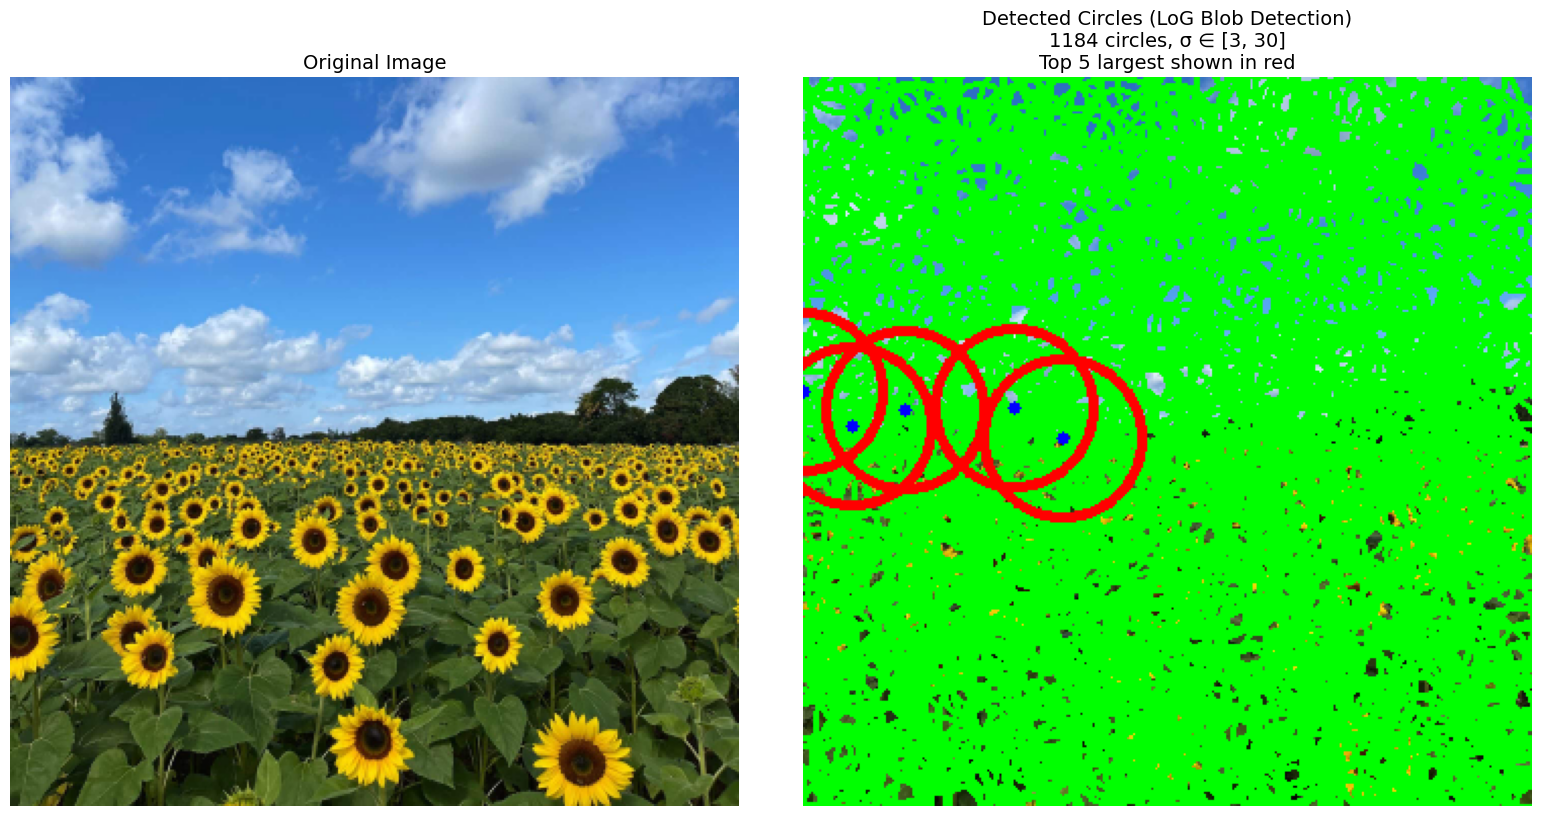

Scale-space visualization saved as 'scale_space_visualization.png'


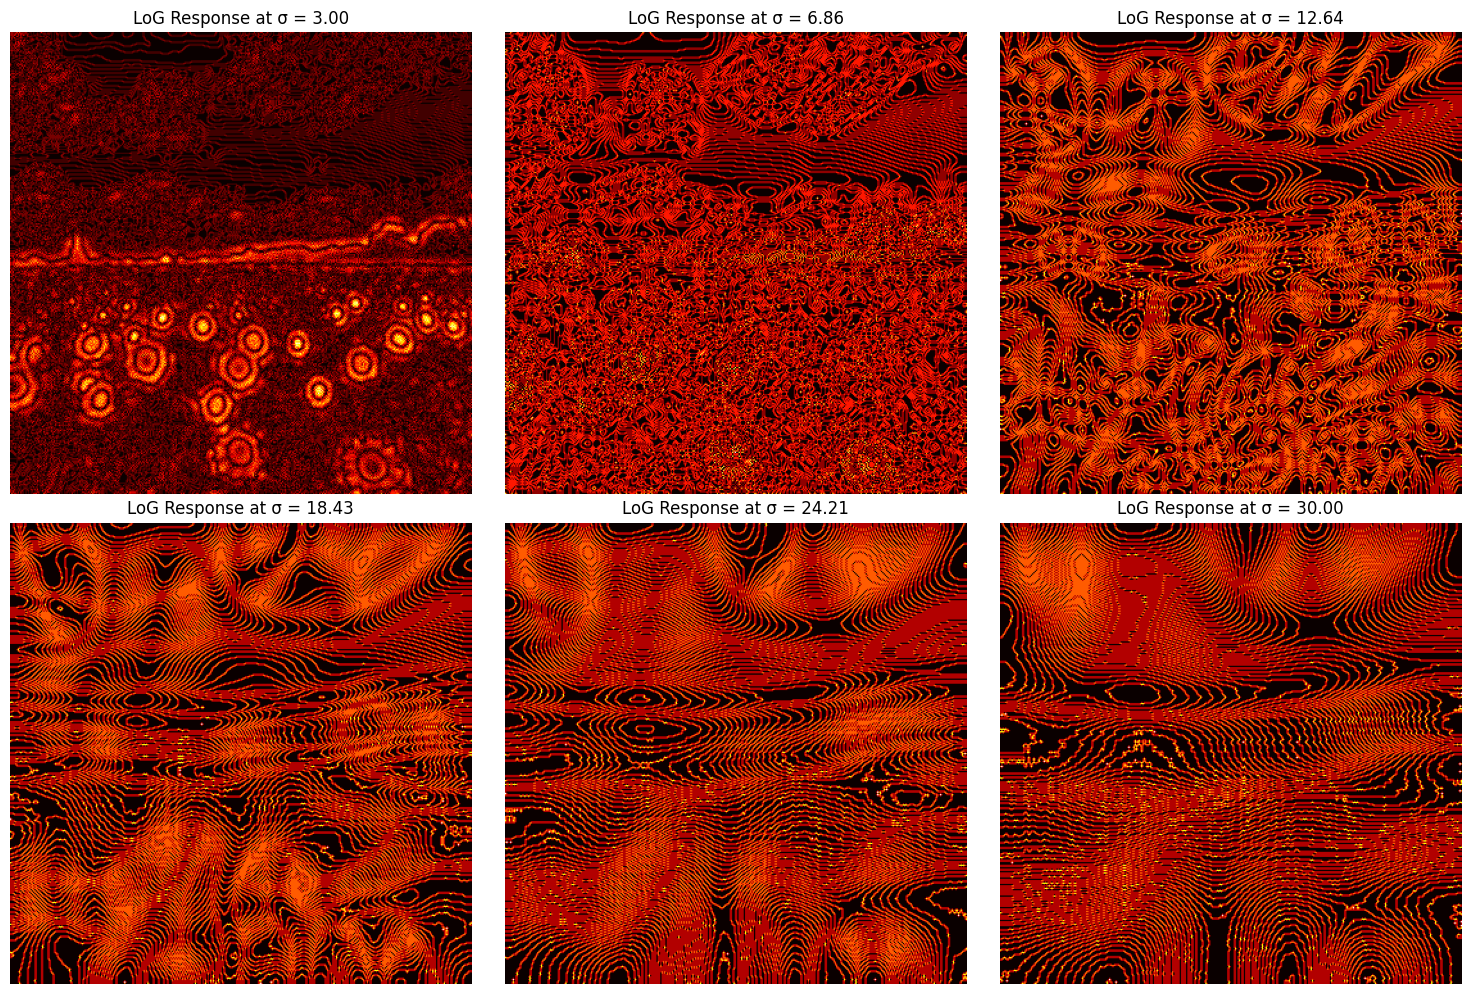

In [58]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

def compute_laplacian_of_gaussian(image, sigma):
    """
    Compute Laplacian of Gaussian for a given sigma
    """
    # Apply Gaussian blur
    gaussian = cv.GaussianBlur(image, (0, 0), sigma)
    
    # Compute Laplacian
    laplacian = cv.Laplacian(gaussian, cv.CV_64F)
    
    # Normalize by sigma^2 for scale invariance
    laplacian_normalized = (sigma ** 2) * np.abs(laplacian)
    
    return laplacian_normalized

def find_scale_space_extrema(scale_space, threshold_rel=0.03):
    """
    Find local maxima in scale-space (x, y, sigma)
    """
    num_scales = len(scale_space)
    extrema = []
    
    # Get absolute threshold based on max response
    max_response = np.max([np.max(scale) for scale in scale_space])
    threshold = threshold_rel * max_response
    
    # Check each scale
    for s in range(1, num_scales - 1):
        # Get local maxima in spatial domain
        data = scale_space[s]
        data_max = ndimage.maximum_filter(data, size=5)
        maxima = (data == data_max)
        
        # Apply threshold
        maxima[data < threshold] = 0
        
        # Get coordinates of maxima
        coords = np.argwhere(maxima)
        
        # Check if it's also maximum in scale direction
        for y, x in coords:
            val = data[y, x]
            
            # Compare with neighboring scales
            if s > 0 and val < scale_space[s-1][y, x]:
                continue
            if s < num_scales - 1 and val < scale_space[s+1][y, x]:
                continue
            
            extrema.append((x, y, s, val))
    
    return extrema

def non_maximum_suppression(blobs, overlap_threshold=0.5):
    """
    Remove overlapping blobs, keeping the ones with stronger response
    """
    if len(blobs) == 0:
        return []
    
    # Sort by response strength (descending)
    blobs = sorted(blobs, key=lambda x: x[3], reverse=True)
    
    kept_blobs = []
    
    for blob in blobs:
        x, y, sigma, response = blob
        radius = sigma * np.sqrt(2)
        
        # Check overlap with already kept blobs
        keep = True
        for kept_blob in kept_blobs:
            kx, ky, ksigma, _ = kept_blob
            kradius = ksigma * np.sqrt(2)
            
            # Calculate distance between centers
            dist = np.sqrt((x - kx)**2 + (y - ky)**2)
            
            # Check if circles overlap significantly
            if dist < (radius + kradius) * overlap_threshold:
                keep = False
                break
        
        if keep:
            kept_blobs.append(blob)
    
    return kept_blobs

# Load image
im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

if im is None:
    print("Error: Could not load image. Please ensure 'the_berry_farms_sunflower_field.jpeg' exists.")
else:
    # Convert to grayscale
    gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
    
    # Define range of sigma values
    # For sunflowers, we expect radii roughly from 5 to 40 pixels
    # Since radius ≈ sqrt(2) * sigma, we need sigma from ~3.5 to ~28
    sigma_min = 3
    sigma_max = 30
    num_scales = 15
    
    sigmas = np.linspace(sigma_min, sigma_max, num_scales)
    
    print(f"Detecting blobs with σ range: [{sigma_min:.2f}, {sigma_max:.2f}]")
    print(f"Number of scales: {num_scales}")
    print("Computing scale-space representation...")
    
    # Build scale-space representation
    scale_space = []
    for i, sigma in enumerate(sigmas):
        log_response = compute_laplacian_of_gaussian(gray, sigma)
        scale_space.append(log_response)
        print(f"  Scale {i+1}/{num_scales}: σ = {sigma:.2f}")
    
    print("\nFinding scale-space extrema...")
    # Find extrema in scale-space
    extrema = find_scale_space_extrema(scale_space, threshold_rel=0.02)
    print(f"Found {len(extrema)} initial extrema")
    
    # Apply non-maximum suppression
    print("Applying non-maximum suppression...")
    blobs = non_maximum_suppression(extrema, overlap_threshold=0.6)
    print(f"Kept {len(blobs)} blobs after suppression")
    
    # Convert blob parameters to circles (x, y, radius)
    circles = []
    for x, y, scale_idx, response in blobs:
        sigma = sigmas[scale_idx]
        radius = sigma * np.sqrt(2)
        circles.append((x, y, radius, sigma, response))
    
    # Sort by radius to find largest circles
    circles_sorted = sorted(circles, key=lambda x: x[2], reverse=True)
    
    # Report largest circles
    print("\n" + "="*60)
    print("LARGEST CIRCLES DETECTED:")
    print("="*60)
    num_to_report = min(10, len(circles_sorted))
    for i in range(num_to_report):
        x, y, radius, sigma, response = circles_sorted[i]
        print(f"{i+1}. Center: ({x:.1f}, {y:.1f}), Radius: {radius:.2f} pixels, "
              f"σ: {sigma:.2f}, Response: {response:.2f}")
    
    print("\n" + "="*60)
    print("PARAMETERS SUMMARY:")
    print("="*60)
    print(f"σ range used: [{sigma_min}, {sigma_max}]")
    print(f"Number of scales: {num_scales}")
    print(f"Total circles detected: {len(circles)}")
    if len(circles) > 0:
        largest = circles_sorted[0]
        print(f"\nLargest circle:")
        print(f"  Center: ({largest[0]:.1f}, {largest[1]:.1f})")
        print(f"  Radius: {largest[2]:.2f} pixels")
        print(f"  σ: {largest[3]:.2f}")
    
    # Visualize results
    result_img = im.copy()
    
    # Draw all detected circles
    for x, y, radius, sigma, response in circles:
        color = (0, 255, 0)  # Green for regular circles
        thickness = 2
        cv.circle(result_img, (int(x), int(y)), int(radius), color, thickness)
    
    # Highlight the largest circles (top 5) in red
    for i in range(min(5, len(circles_sorted))):
        x, y, radius, sigma, response = circles_sorted[i]
        cv.circle(result_img, (int(x), int(y)), int(radius), (0, 0, 255), 3)
        # Draw center point
        cv.circle(result_img, (int(x), int(y)), 3, (255, 0, 0), -1)
    
    # Create visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Original image
    axes[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
    axes[0].set_title('Original Image', fontsize=14)
    axes[0].axis('off')
    
    # Result with detected circles
    axes[1].imshow(cv.cvtColor(result_img, cv.COLOR_BGR2RGB))
    axes[1].set_title(f'Detected Circles (LoG Blob Detection)\n'
                     f'{len(circles)} circles, σ ∈ [{sigma_min}, {sigma_max}]\n'
                     f'Top 5 largest shown in red', fontsize=14)
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.savefig('blob_detection_results.png', dpi=150, bbox_inches='tight')
    print("\nVisualization saved as 'blob_detection_results.png'")
    plt.show()
    
    # Optional: Show scale-space visualization for a few scales
    fig2, axes2 = plt.subplots(2, 3, figsize=(15, 10))
    axes2 = axes2.flatten()
    
    scale_indices = np.linspace(0, len(sigmas)-1, 6, dtype=int)
    for i, idx in enumerate(scale_indices):
        axes2[i].imshow(scale_space[idx], cmap='hot')
        axes2[i].set_title(f'LoG Response at σ = {sigmas[idx]:.2f}', fontsize=12)
        axes2[i].axis('off')
    
    plt.tight_layout()
    plt.savefig('scale_space_visualization.png', dpi=150, bbox_inches='tight')
    print("Scale-space visualization saved as 'scale_space_visualization.png'")
    plt.show()

# Q2)

# Q3)
